In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
##app_data_d.csv 파일을 불러오고 "1,000,000,000+" column을 "100,000,000~"으로 바꿔준다
data_p = pd.read_csv("app_data_d.csv", index_col=[0])
data_p = data_p.replace('1,000,000,000+', '100,000,000 ~')
data_p

,Unnamed: 0.1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000 ~ 100,000",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"10,000,000 ~ 100,000,000",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,10834,FR Calculator,FAMILY,4.0,7,2600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"1,000 ~ 10,000",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000 ~ 10,000",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
## 편의상 App, Installs, Prices만 포함된 data를 따로 만든다
data_price=data_p[["App","Installs","Price"]]
data_price

,App,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,"10,000 ~ 100,000",0.0
1,Coloring book moana,"100,000 ~ 1,000,000",0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...","1,000,000 ~ 10,000,000",0.0
3,Sketch - Draw & Paint,"10,000,000 ~ 100,000,000",0.0
4,Pixel Draw - Number Art Coloring Book,"100,000 ~ 1,000,000",0.0
...,...,...,...
9361,FR Calculator,"1 ~ 1,000",0.0
9362,Sya9a Maroc - FR,"1,000 ~ 10,000",0.0
9363,Fr. Mike Schmitz Audio Teachings,"1 ~ 1,000",0.0
9364,The SCP Foundation DB fr nn5n,"1,000 ~ 10,000",0.0


In [5]:

##sns.boxplot(data=data_price, x="Installs", y="Price")
##plt.xticks(rotation = 90, fontsize = 10)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

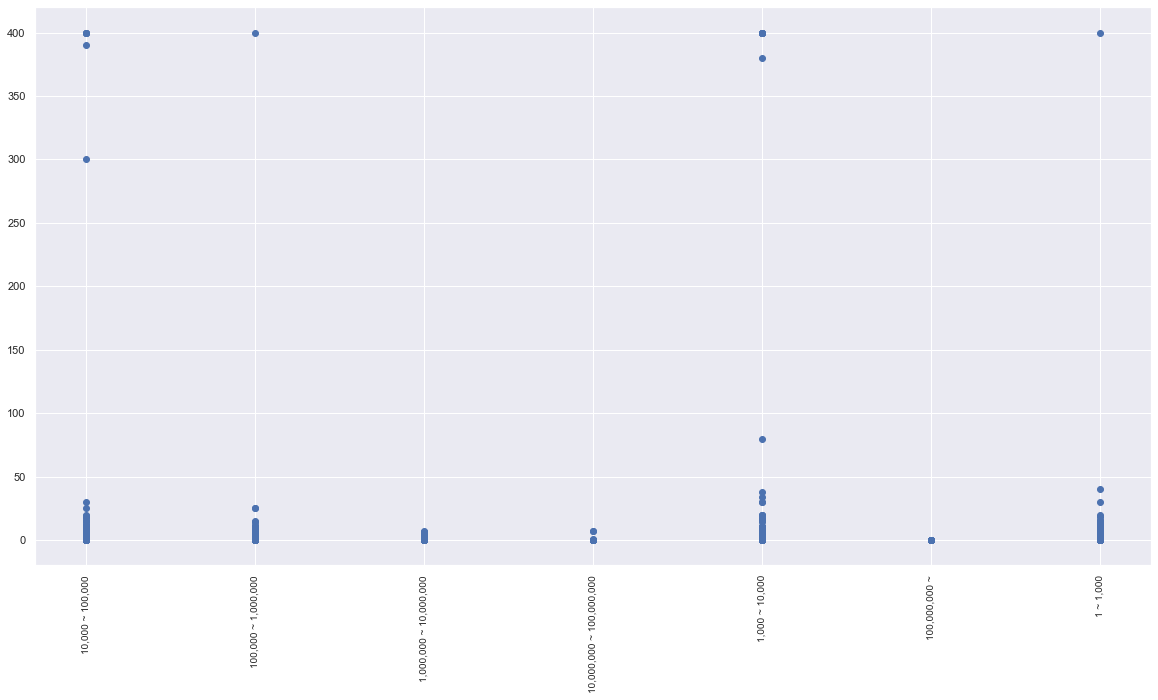

In [6]:
## Scatter plot으로 데이터의 분포를 확인한다.
sns.set(rc={'figure.figsize':(20,10.27)})
plt.scatter(data_price["Installs"],data_price["Price"])
plt.xticks(rotation = 90, fontsize = 10)

In [7]:
## spearmanr을 사용하여 Installs와 Price의 상관관계를 나타낸다
## H0: Installs와 Price는 관계가 없다
## HA: Installs와 Price는 관계가 있다
from scipy.stats import spearmanr

print(spearmanr(data_price["Installs"],data_price["Price"]))

SpearmanrResult(correlation=-0.15410067872735947, pvalue=2.4231434102331442e-48)


In [1]:
## p-value의 값이 0.05보다 작으므로 H0 가설을 반박한다. 따라서 Installs 와 Price는 상관관계가 있다.

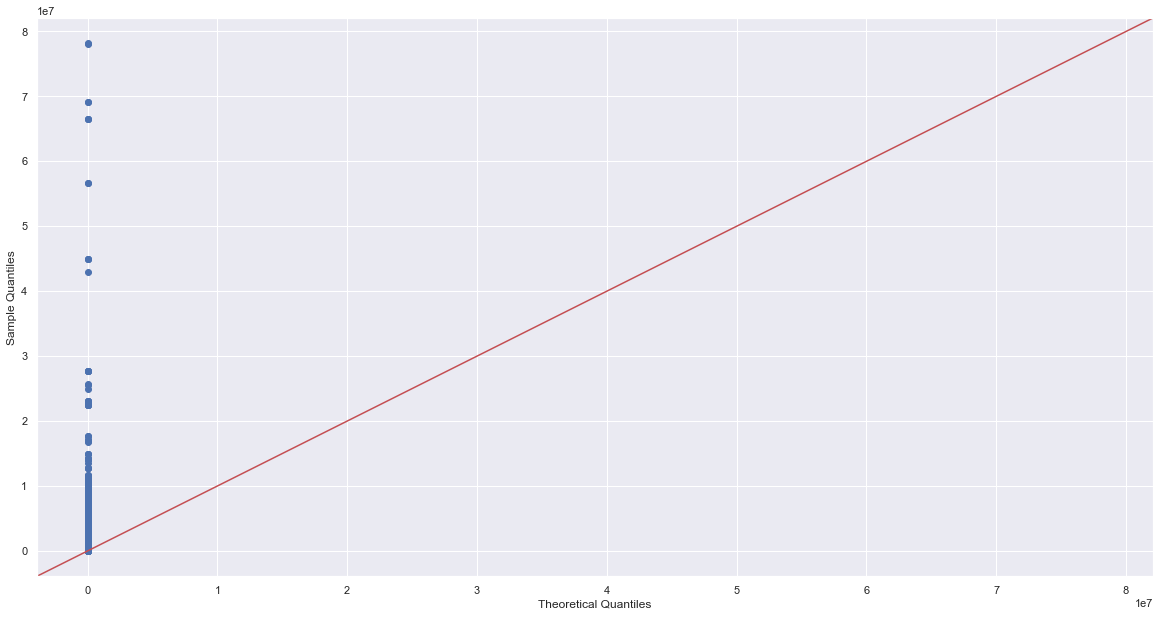

In [14]:
price = data_p["Reviews"]
import statsmodels.api as sm

sm.qqplot(price, line="45")
plt.show()

(array([8.858e+03, 1.000e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.300e+01]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300., 320., 340., 360., 380., 400.]),
 <BarContainer object of 20 artists>)

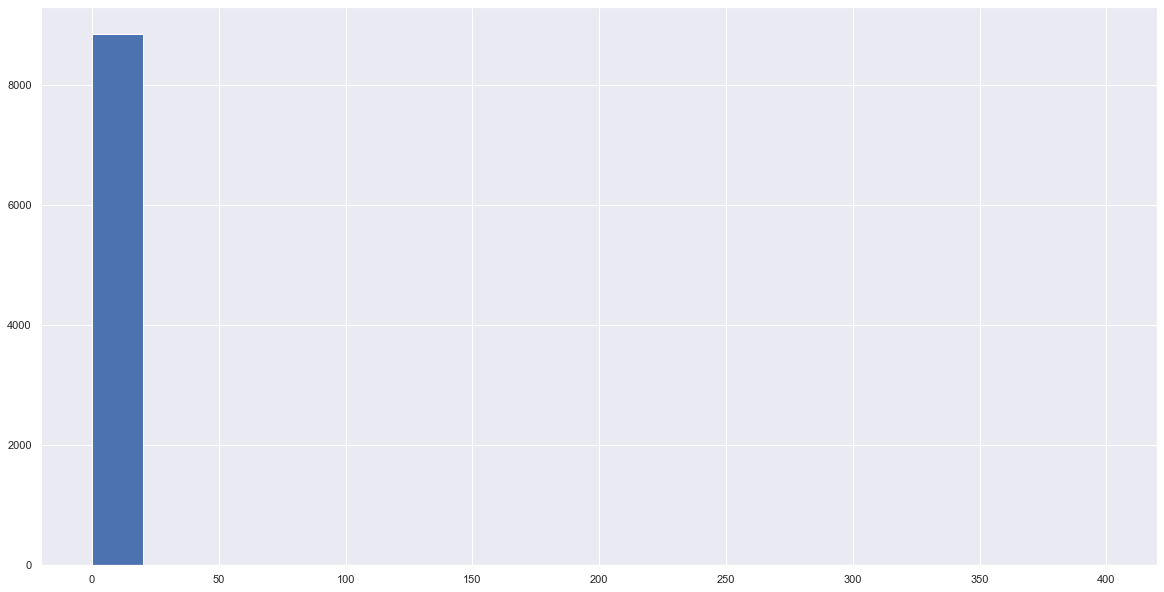

In [10]:
plt.hist(price, bins=20)